# Emittance Calculation

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import ipywidgets

## Import csv with the positions intensities and other useful data to calculate the emittance

In [29]:
df = pd.read_csv("Results/Results_final.csv")

In [30]:
df

,,Label,Area,Mean,Min,Max,X,Y,XM,YM,Perim.,Major,Minor,Angle,IntDen,RawIntDen
0,1,pperpot_6K-2.tif:0001-0015,0.060573,17788.000000,10240,28202,8.112939,12.118141,8.113629,12.117228,0.960936,0.312522,0.246779,141.858252,1077.471794,6421468
1,2,pperpot_6K-2.tif:0002-0015,0.132052,26488.404066,12850,42710,8.166679,0.173604,8.166634,0.172610,1.380431,0.460020,0.365494,176.031102,3497.857499,20846374
2,3,pperpot_6K-2.tif:0003-0017,0.124837,24723.997312,11225,39577,8.713135,0.193414,8.710933,0.192225,1.383574,0.417102,0.381077,121.360795,3086.478178,18394654
3,4,pperpot_6K-2.tif:0004-0053,0.115777,25306.771014,14571,37449,8.703223,0.700501,8.702714,0.700380,1.283090,0.420540,0.350529,84.332441,2929.931141,17461672
4,5,pperpot_6K-2.tif:0005-0053,0.146147,25540.195178,10286,45056,9.263129,0.689545,9.262096,0.692269,1.430943,0.440285,0.422635,117.289914,3732.621509,22245510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,pperpot_6K-2.tif:0386-0930,0.129703,29061.078913,12297,51192,4.872051,12.078766,4.874666,12.079468,1.365255,0.429151,0.384814,32.847987,3769.318319,22464214
386,387,pperpot_6K-2.tif:0387-0931,0.117119,27933.532951,15788,43451,5.966702,12.069618,5.966854,12.071516,1.276804,0.395361,0.377175,74.390376,3271.544843,19497606
387,388,pperpot_6K-2.tif:0388-0931,0.122656,27213.321477,11204,43008,6.495168,12.072191,6.495377,12.071525,1.281249,0.408008,0.382764,54.063681,3337.878442,19892938
388,389,pperpot_6K-2.tif:0389-0931,0.110575,24821.180577,13168,37659,7.046633,12.079790,7.046243,12.080622,1.255342,0.391491,0.359621,98.993634,2744.602384,16357158


## Find the center point of the beam: Get the spot with the least deviation from the sorrounding ones
Taking into account that the *beam is diverging* we will suppose the the least deviation from the others means that is the center. 
For each point we save the sumation of the 4 minimum distances from all the other points. We will consider that the center will be the spot whose sumation is the minimum. It must fulfill also that is inside a (Ax, Ay) bounds from the pyhiscal center.

In [31]:
# Define the (Ax, Ay) bounds (mm)
Ax = 1
Ay = 1

In [32]:
# Get the X and Y arrays
x = df['X'].to_numpy()
y = df['Y'].to_numpy()

In [33]:
# Calculate the center
cx = (np.max(x) + np.min(x))/2
cy = (np.max(y) + np.min(y))/2

In [34]:
# Get the 4 minimum distances and then the addition of them for each point
# 5 distances buffer. One is going to be 0, because it is the distance from 
# itself.
buffer4d = np.zeros((5))
buffer4dindex = []
mindists = np.zeros((x.shape))
mindistsindex = []
for i in range(len(x)):
    for j in range(len(x)):
       distcalc = np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
       if j < 5:
           buffer4d[j] = distcalc
           buffer4dindex.append((distcalc,j))
       else:
           buffer4d = np.sort(buffer4d)
           buffer4dindex = sorted(buffer4dindex, key=lambda x: x[0]) 
           if distcalc < buffer4d[4]:
               buffer4d[4] = distcalc
               buffer4dindex[4]= (distcalc,j)
               buffer4d = np.sort(buffer4d) # The last index must be sorted too
       
    mindists[i] = np.sum(buffer4d)
    mindistsindex.append(buffer4dindex)
    buffer4dindex = []
    i = i + 1
# Get the index of the the sumation of the 4 minimum distances from all the 
# other points.
centerindex = np.argmin(mindists) 
print("Center index: ", centerindex)
print("Center index indices: ", mindistsindex[centerindex])



Center index:  348
Center index indices:  [(0.0, 348), (0.4786656583169509, 347), (0.5226478679158645, 340), (0.5279095503597182, 351), (0.5424136167354218, 359)]


In [35]:
# Remove the minima that is not inside the (Ax, Ay) boundaries
while np.abs(x[centerindex]-cx)> Ax and np.abs(y[centerindex]-cy)> Ay:
    mindists = np.delete(mindists,centerindex)
    centerindex = np.argmin(mindists)
    
print("Center index: ", centerindex)
print("Center distance from pyhisical center: ", 
      x[centerindex]-cx, y[centerindex]-cy)
print("Center index neighbour indices: ", mindistsindex[centerindex])

Center index:  197
Center distance from pyhisical center:  -0.7472050000000001 0.008994500000000905
Center index neighbour indices:  [(0.0, 197), (0.5290561329017931, 198), (0.5381419025517339, 196), (0.5409161758738593, 212), (0.5636015288357553, 159)]


In [47]:
# Translate all points to the calculated center 
x = x - x[centerindex]
y = y - y[centerindex]

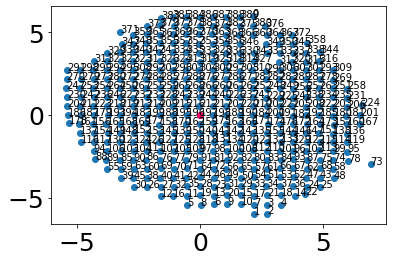

In [37]:
# Draw the points and highlight the center.
fig, ax = plt.subplots()
ax.scatter(x, y)

for i in range(len(x)):
    if i == centerindex:
        ax.scatter(x[i], y[i], color="#FF0066")
    ax.annotate(i, (x[i], y[i]))
    
plt.rcParams['figure.figsize'] = [9.5, 6.0]
#plt.figure(figsize=(32, 24), dpi=300)

## Create a master (regular) mesh taking the  calculated center. We suppose grid is symmetric in both x and y axes. 
We also scale the image so the distance between the points near the calculated center (Amesh) is the same that the distance between the points of the Pepperpot grid (Aactualmesh).

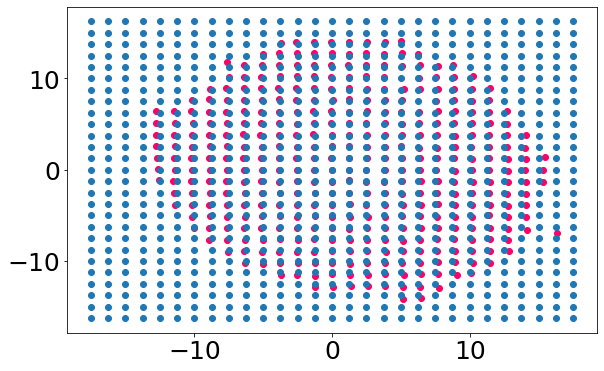

In [38]:
# Define the distance from spots of the master mesh.
Aactualmesh = 1.25 # in mm.
# Scale our points set
Amesh = np.abs(x[centerindex]-x[centerindex+1])
xs = x * Aactualmesh/Amesh
ys = y * Aactualmesh/Amesh

Amesh = Aactualmesh # Now both are the same

# Define the numer of extra points we will draw in case the beam is not
# circular. It has to be even.
extraMesh = 4

# Calculate the number of points we need to create the mesh
# We need to be odd, so, if it is even we sum one.
# It is easier to add one than to calculate which is the longest set.
nx = np.ceil(np.abs(np.max(xs) - np.min(xs))/Amesh)
if np.mod(nx,2) == 0:
    nx = nx + 1
ny = np.ceil(np.abs(np.max(ys) - np.min(ys))/Amesh)
if np.mod(ny,2) == 0:
    ny = ny + 1
# Add extra points
nx = nx + extraMesh
ny = ny + extraMesh

# Create the mesh
xm = np.zeros(int(nx*ny))
ym = np.zeros(int(nx*ny))
k = 0 
for i in range(int(nx/2)+1):
    for j in range(int(ny/2)+1):
        if i * j == 0: # Axes
            if i != 0 or j != 0: # (0,0) is already filled
                if i == 0: # Fill x = 0
                    ym[k] = j*Amesh
                    k = k + 1
                    ym[k] = -j*Amesh
                    k = k + 1
                if j == 0: # Fill y = 0
                    xm[k] = i*Amesh
                    k = k + 1
                    xm[k] = -i*Amesh
                    k = k + 1
        else: # Fill what remainds
            xm [k] =  (i)*Amesh
            ym [k] =  (j)*Amesh
            k = k + 1
            xm [k] =  (i)*Amesh
            ym [k] =  -(j)*Amesh
            k = k + 1
            xm [k] =  -(i)*Amesh
            ym [k] =  (j)*Amesh
            k = k + 1
            xm [k] =  -(i)*Amesh
            ym [k] =  -(j)*Amesh
            k = k + 1

fig, ax = plt.subplots()
ax.scatter(xs,ys,color="#FF0066")
ax.scatter(xm, ym)

## Emittance Calculation
$\epsilon_{rms}=\sqrt{<x^{2}><x'^{2}>-<xx'>^{2}}$ 

with

$<x^{2}>=\frac{1}{N}\sum \limits _{i=1} ^{N} (x_{i}-\overline {x})^{2}$ 

$\overline {x} = \frac{1}{N}\sum \limits _{i=1} ^{N} x_{i}$ 

$<xx'>=\frac{1}{N}\sum \limits _{i=1} ^{N} (x_{i}-\overline {x})(x'_{i}-\overline {x'})$ 

Emittance x rms (mmmrad):  0.009954267618369516
Emittance y rms (mmmrad):  0.012286504099979414
Emittance x rms (pimmmrad):  0.003168541792646194
Emittance y rms (pimmmrad):  0.003910915721661125


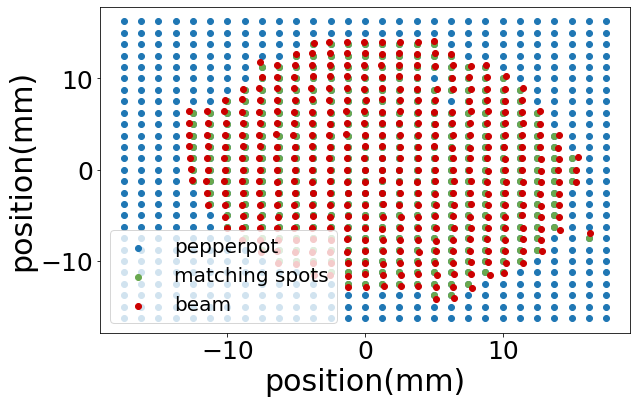

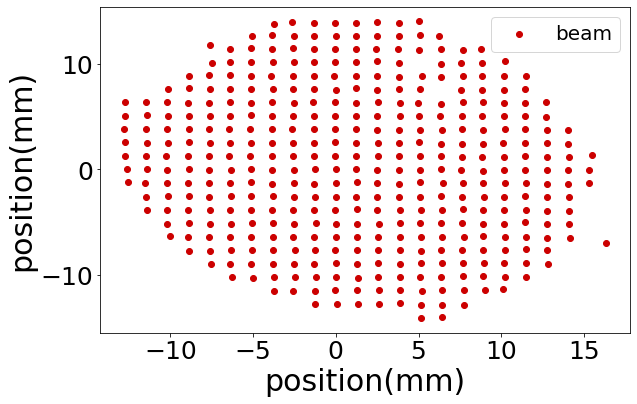

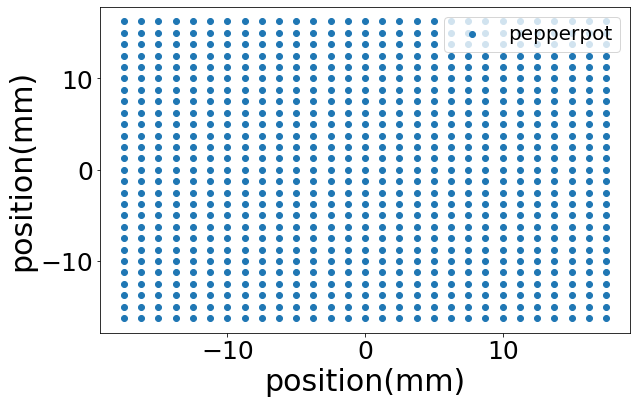

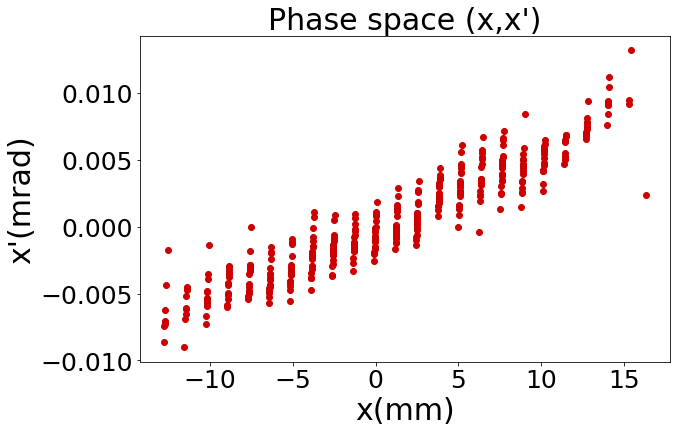

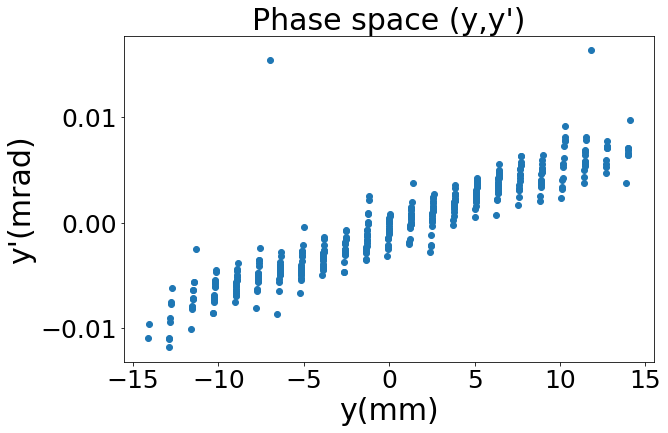

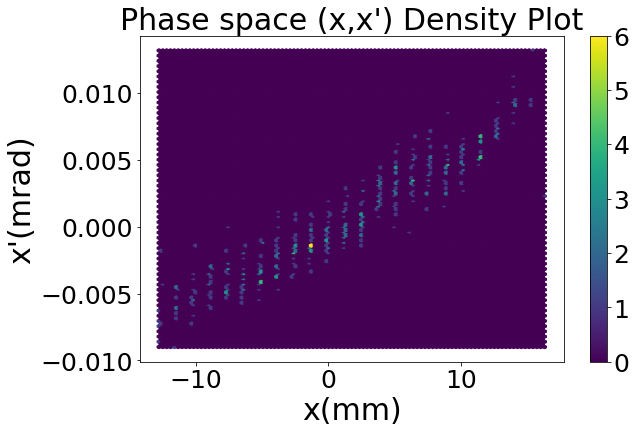

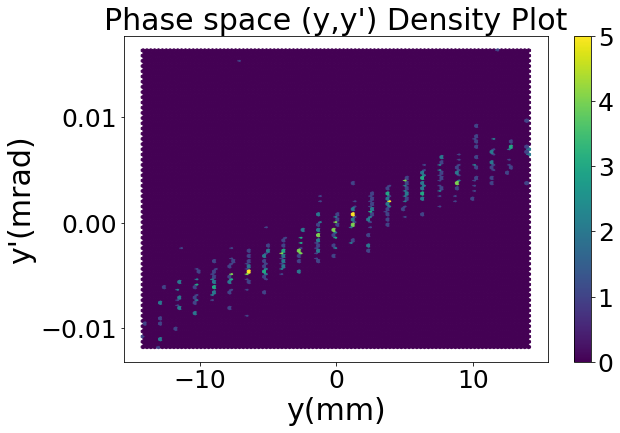

In [39]:
# Define the distance from the mesh and the image. This value is set by 
# pepper physical imlpementation
L = 35 # mm
# Find the mesh and the image related points indices
meshrelation = np.zeros((len(xs),2))
mindistindex = np.zeros((1,2))
for i in range(len(xs)):
    mindist = Amesh
    distcalc = 0
    for j in range(len(xm)):
        distcalc = np.sqrt((xs[i]-xm[j])**2+(ys[i]-ym[j])**2)
        if mindist > distcalc:
            mindistindex [0][0]= i
            mindistindex [0][1]= j
            mindist = distcalc
    meshrelation[i] = mindistindex
#print(meshrelation)

# Draw the points and highlight the center.
fig, ax = plt.subplots()
plt.rc('font', size=30) #controls default text size
plt.rc('axes', titlesize=30) #fontsize of the title
plt.rc('axes', labelsize=30) #fontsize of the x and y labels
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels
plt.rc('legend', fontsize=20) #fontsize of the legend
ax.scatter(xm, ym, marker = 'o',label="pepperpot")
for i in range(len(xs)):
    ax.scatter(xm[int(meshrelation[i][1])], ym[int(meshrelation[i][1])], 
               color="#6AA84F")
    #ax.annotate(i, (xs[i], ys[i]))
    #ax.annotate(i, (xm[int(meshrelation[i][1])], ym[int(meshrelation[i][1])]))
ax.scatter(xm[int(meshrelation[i][1])], ym[int(meshrelation[i][1])], 
           color="#6AA84F", label="matching spots") #Repeated last to set legend
ax.scatter(xs,ys,color="#CC0000", label="beam")
ax.legend()
ax.set_xlabel ("position(mm)")
ax.set_ylabel ("position(mm)")
plt.savefig ("positions")

# Save individual figures
fig, ax = plt.subplots()
ax.scatter(xs,ys,color="#CC0000", label="beam")
ax.legend()
ax.set_xlabel ("position(mm)")
ax.set_ylabel ("position(mm)")
plt.savefig ("beam_positions")

# Save individual figures
fig, ax = plt.subplots()
ax.scatter(xm, ym, marker = 'o',label="pepperpot")
ax.legend()
ax.set_xlabel ("position(mm)")
ax.set_ylabel ("position(mm)")
plt.savefig ("mesh_positions")


# Calculate x' and y'
xsp = np.zeros(len(xs))
ysp = np.zeros(len(ys))
i = 0
for inds in meshrelation:
    #print(xs[int(inds[0])])
    xsp[i] = (xs[int(inds[0])] - xm[int(inds[1])])/L
    ysp[i] = (ys[int(inds[0])] - ym[int(inds[1])])/L
    i = i + 1

xsmean = np.mean(xs) # \overline{x}
xspmean = np.mean(xsp) # \overline{x'}
xs2 = np.mean((xs-xsmean)**2) # <x^{2}>
xsp2 = np.mean((xsp-xspmean)**2) # <x'^{2}>
xsxsp = np.mean((xs-xsmean)*(xsp-xspmean)) # <xx'> 
ysmean = np.mean(ys) 
yspmean = np.mean(ysp)
ys2 = np.mean((ys-ysmean)**2) 
ysp2 = np.mean((ysp-yspmean)**2)
ysysp = np.mean((ys-ysmean)*(ysp-yspmean)) 

exrms = np.sqrt(xs2*xsp2-xsxsp**2)
eyrms = np.sqrt(ys2*ysp2-ysysp**2)

print ("Emittance x rms (mmmrad): ", exrms)
print ("Emittance y rms (mmmrad): ", eyrms)
print ("Emittance x rms (pimmmrad): ", exrms/np.pi)
print ("Emittance y rms (pimmmrad): ", eyrms/np.pi)

# Phase spaces
fig, ax = plt.subplots()
ax.scatter(xs,xsp,color="#CC0000")
ax.set_xlabel ("x(mm)")
ax.set_ylabel ("x'(mrad)")
ax.set_title ("Phase space (x,x')")
plt.savefig ("exrms")
fig1, ax1 = plt.subplots()
ax1.scatter(ys,ysp)
ax1.set_xlabel ("y(mm)")
ax1.set_ylabel ("y'(mrad)")
ax1.set_title ("Phase space (y,y')")
plt.savefig ("eyrms")

# Densities
fig, ax = plt.subplots()
sca = ax.hexbin(xs,xsp)
ax.set_xlabel('x(mm)')
ax.set_ylabel("x'(mrad)")
ax.set_title ("Phase space (x,x') Density Plot")
fig.colorbar(sca)
plt.savefig ("exrms_density")

fig, ax = plt.subplots()
sca = ax.hexbin(ys,ysp)
ax.set_xlabel('y(mm)')
ax.set_ylabel("y'(mrad)")
ax.set_title ("Phase space (y,y') Density Plot")
fig.colorbar(sca)
plt.savefig ("eyrms_density")

# Beam intensities plot

In [40]:
# Get the X and Y arrays
I = df['IntDen'].to_numpy()
Inorm = I/np.max(I) # Nomalized I
rI = df['RawIntDen'].to_numpy()

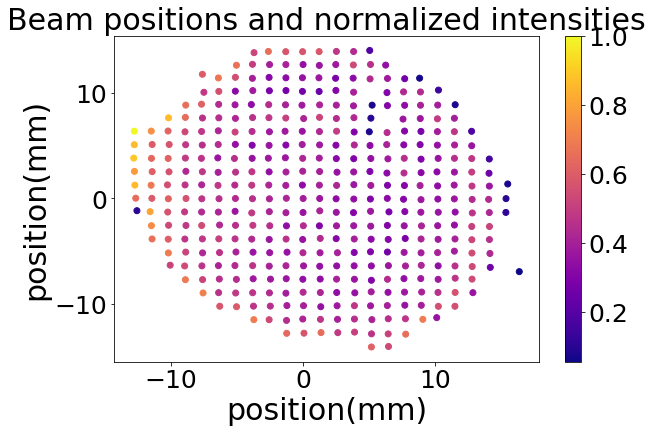

In [41]:
fig, ax = plt.subplots()
sca = ax.scatter(xs,ys,c = Inorm, cmap='plasma')
fig.colorbar(sca) 
ax.set_title ("Beam positions and normalized intensities")
ax.set_xlabel ("position(mm)")
ax.set_ylabel ("position(mm)")
plt.savefig ("positions_intensities")

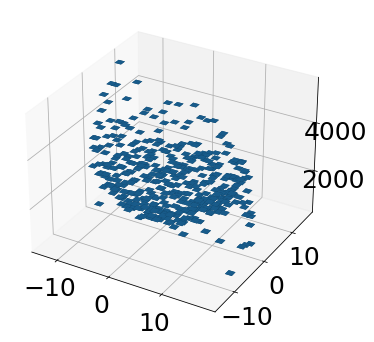

In [42]:
fig = plt.figure() # figsize=(13, 7)
ax = plt.axes(projection ='3d')
dx=dy=dz=Amesh
ax.bar3d(xs, ys, I,dx,dy,dz, cmap='plasma')

## Another representation to understand the divergence

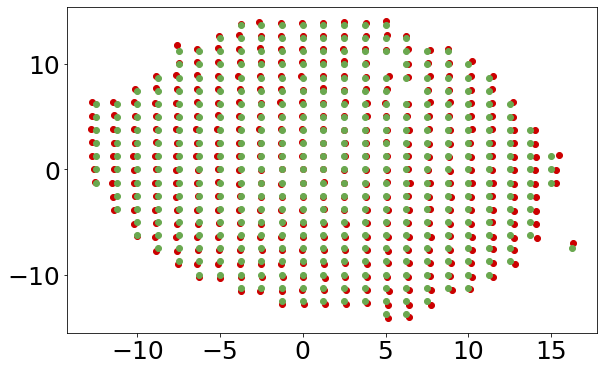

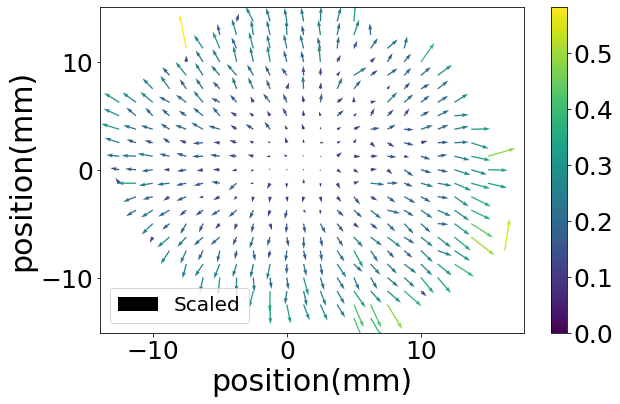

sqrt = 0 @ index i =  197


C:\Users\Usuario\AppData\Local\Temp/ipykernel_5340/2425894300.py:32: RuntimeWarning: invalid value encountered in true_divide
  u = (xs-xsm)/np.sqrt((xs-xsm)**2+(ys-ysm)**2)
C:\Users\Usuario\AppData\Local\Temp/ipykernel_5340/2425894300.py:33: RuntimeWarning: invalid value encountered in true_divide
  v = (ys-ysm)/np.sqrt((xs-xsm)**2+(ys-ysm)**2)


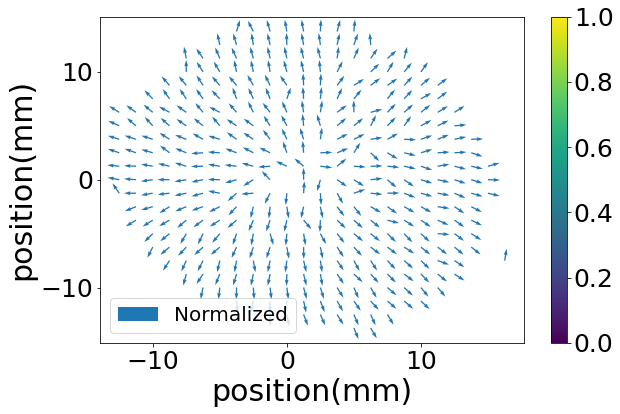

In [43]:
# Arrowed plot (default scale)
xsm = np.zeros((len(xs))) # Mesh grid points that mach the beam
ysm = np.zeros((len(xs))) # Mesh grid points that mach the beam
for i in range(len(xs)):
    xsm[i]= xm[int(meshrelation[i][1])]
    ysm[i]= ym[int(meshrelation[i][1])]

fig, ax = plt.subplots()
ax.scatter(xs,ys,color="#CC0000", label="beam")
ax.scatter(xsm,ysm,color="#6AA84F", label="matching")

u = xs-xsm
v = ys-ysm
color = np.sqrt((xs-xsm)**2+(ys-ysm)**2)

fig, ax = plt.subplots()
sca = ax.quiver(xsm,ysm,u,v, color, label="Scaled")
ax.legend()
fig.colorbar(sca)
ax.set_xlabel ("position(mm)")
ax.set_ylabel ("position(mm)")
plt.savefig ("beam_positions_arrows_scaled")
plt.show()

# Arrowed normalized plot
usm = np.zeros((len(xs)))
vsm = np.zeros((len(xs)))
# In the center point we diveide by 0
for i in range(len(xs)):
    if np.sqrt((xs[i]-xsm[i])**2+(ys[i]-ysm[i])**2) == 0:
        print ("sqrt = 0 @ index i = ", i)
u = (xs-xsm)/np.sqrt((xs-xsm)**2+(ys-ysm)**2)
v = (ys-ysm)/np.sqrt((xs-xsm)**2+(ys-ysm)**2)
color = np.sqrt((xs-xsm)**2+(ys-ysm)**2)

fig, ax = plt.subplots()
#ax.scatter(xs,ys,color="#CC0000", label="beam")
#ax.scatter(xsm,ysm,color="#6AA84F", label="matching")
sca = ax.quiver(xsm,ysm,u,v, color="#1f77b4", label = "Normalized")
fig.colorbar(sca)
ax.legend()
ax.set_xlabel ("position(mm)")
ax.set_ylabel ("position(mm)")
plt.savefig ("beam_positions_arrows_normalized")
plt.show()

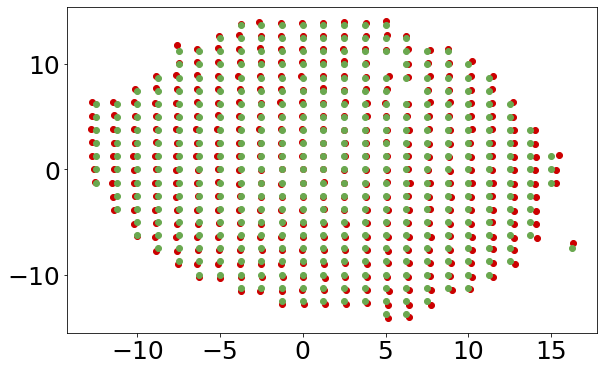

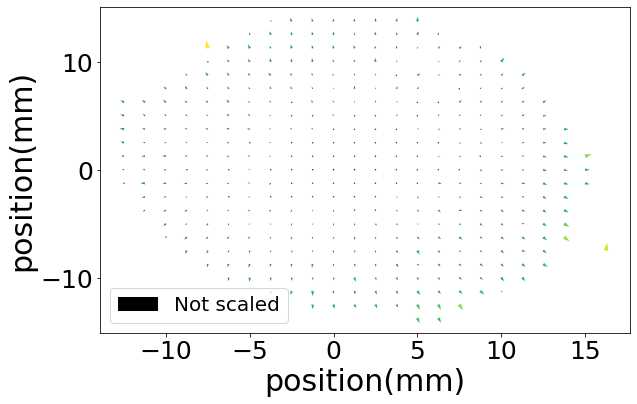

In [44]:
# We need to have np.arrays to be able to scale the quiver plot

npxsm = np.zeros((len(xs))) # Mesh grid points that mach the beam
npysm = np.zeros((len(xs))) # Mesh grid points that mach the beam
npxs = np.zeros((len(xs))) # Mesh grid points that mach the beam
npys = np.zeros((len(xs))) # Mesh grid points that mach the beam
for i in range(len(xs)):
    npxsm[i]= np.array((xm[int(meshrelation[i][1])]))
    npysm[i]= np.array((ym[int(meshrelation[i][1])]))
    npxs [i] = np.array((xs[i]))
    npys [i] = np.array((ys[i]))

fig, ax = plt.subplots()
#ax.scatter(xm, ym, marker = 'o',label="pepperpot")
ax.scatter(xs,ys,color="#CC0000", label="beam")
ax.scatter(xsm,ysm,color="#6AA84F", label="matching")

u = npxs-npxsm
v = npys-npysm
color = np.sqrt((xs-xsm)**2+(ys-ysm)**2)
fig, ax = plt.subplots()
#ax.scatter(xs,ys,color="#CC0000", label="beam")
#ax.scatter(xsm,ysm,color="#6AA84F", label="matching")
ax.quiver(npxsm,npysm,u,v, color, units='xy' ,scale=1, label="Not scaled")
ax.legend()
ax.set_xlabel ("position(mm)")
ax.set_ylabel ("position(mm)")
plt.savefig ("beam_positions_arrows_no_scale")
plt.show()